In [31]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt

## P-E versus salinity timeseries

In [32]:
pe_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historical/yr/atmos/pe/r1i1p1/pe-global-abs_Ayr_CanESM2_historical_r1i1p1_all.nc'
sos_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historical/yr/ocean/sos/r1i1p1/sos-global-amp_Oyr_CanESM2_historical_r1i1p1_all.nc'

In [33]:
pe_cube = iris.load_cube(pe_file, 'precipitation minus evaporation flux')
sos_cube = iris.load_cube(sos_file, 'sea_surface_salinity')

In [34]:
pe_cube.data = pe_cube.data * 86400
pe_mean = pe_cube.data.mean()
pe_std = pe_cube.data.std()
pe_cube.data = (pe_cube.data - pe_mean) / pe_std

In [35]:
sos_mean = sos_cube.data.mean()
sos_std = sos_cube.data.std()
sos_cube.data = (sos_cube.data - sos_mean) / sos_std

In [36]:
%matplotlib inline

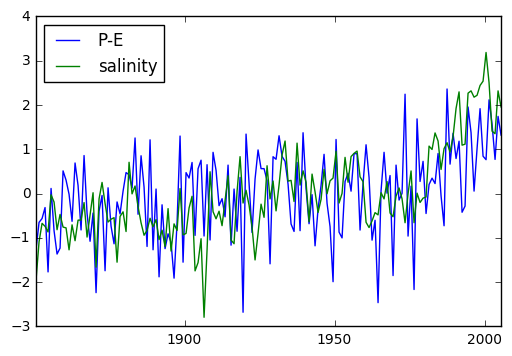

In [38]:
iplt.plot(pe_cube, label='P-E')
iplt.plot(sos_cube, label='salinity')
plt.legend(loc=2)
plt.show()

/g/data/r87/dbi599/miniconda2/envs/default/lib/python2.7/site-packages/iris/cube.py:3659: UserWarning: The bounds of coordinate u'time' were ignored in the rolling window operation.
  'the rolling window operation.' % coord_.name())


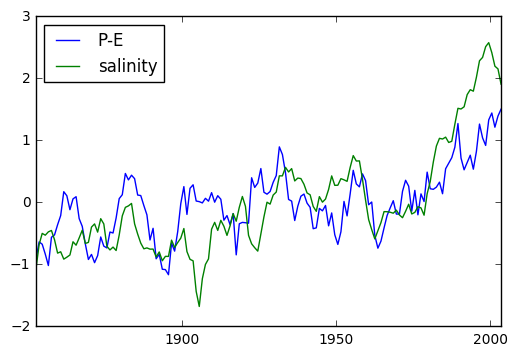

In [39]:
iplt.plot(pe_cube.rolling_window('time', iris.analysis.MEAN, 5), label='P-E')
iplt.plot(sos_cube.rolling_window('time', iris.analysis.MEAN, 5), label='salinity')
plt.legend(loc=2)
plt.show()

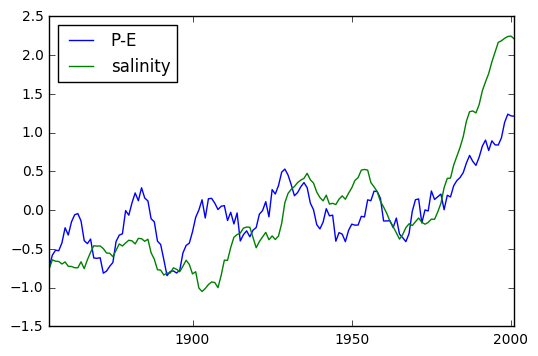

In [40]:
iplt.plot(pe_cube.rolling_window('time', iris.analysis.MEAN, 10), label='P-E')
iplt.plot(sos_cube.rolling_window('time', iris.analysis.MEAN, 10), label='salinity')
plt.legend(loc=2)
plt.show()

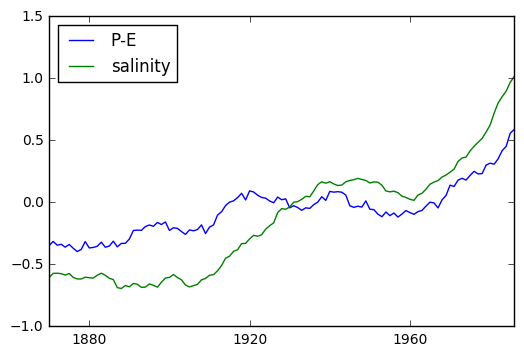

In [41]:
iplt.plot(pe_cube.rolling_window('time', iris.analysis.MEAN, 40), label='P-E')
iplt.plot(sos_cube.rolling_window('time', iris.analysis.MEAN, 40), label='salinity')
plt.legend(loc=2)
plt.show()

## Shape of GHG and AA curves

In [42]:
hist_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historical/yr/atmos/pe/r1i1p1/pe-global-abs_Ayr_CanESM2_historical_r1i1p1_all.nc'
aa_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalMisc/yr/atmos/pe/r1i1p4/pe-global-abs_Ayr_CanESM2_historicalMisc_r1i1p4_all.nc'
ghg_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/atmos/pe/r1i1p1/pe-global-abs_Ayr_CanESM2_historicalGHG_r1i1p1_all.nc'

In [43]:
hist_cube = iris.load_cube(hist_file, 'precipitation minus evaporation flux')
aa_cube = iris.load_cube(aa_file, 'precipitation minus evaporation flux')
ghg_cube = iris.load_cube(ghg_file, 'precipitation minus evaporation flux')

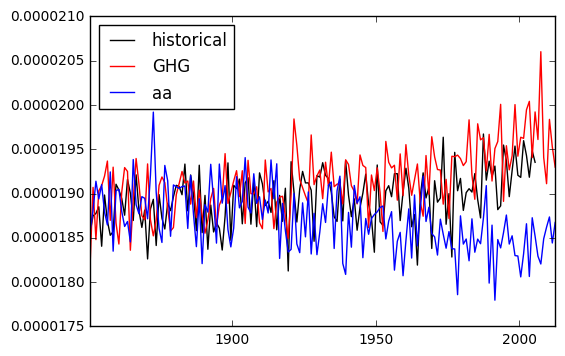

In [47]:
iplt.plot(hist_cube, label='historical', color='black')
iplt.plot(ghg_cube, label='GHG', color='red')
iplt.plot(aa_cube, label='aa', color='blue')
plt.legend(loc=2)
plt.show()

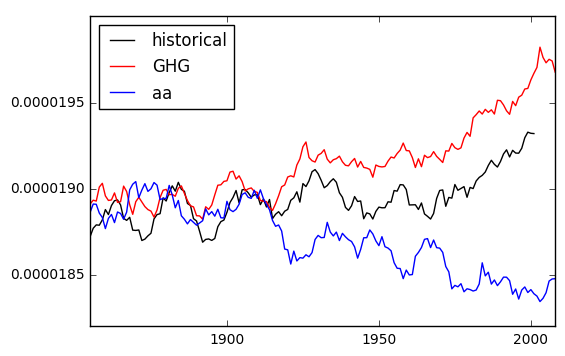

In [46]:
iplt.plot(hist_cube.rolling_window('time', iris.analysis.MEAN, 10), label='historical', color='black')
iplt.plot(ghg_cube.rolling_window('time', iris.analysis.MEAN, 10), label='GHG', color='red')
iplt.plot(aa_cube.rolling_window('time', iris.analysis.MEAN, 10), label='aa', color='blue')
plt.legend(loc=2)
plt.show()